# Yield Plane

With the phonon and charge resolution we can, in principle, predict the distribution in the yield plane for a standard iZIP-type detector.  

In [1]:
import numpy as np
import resfuncRead as rfr

#read the files
ptres = rfr.getRFunc('data/jardin_ptres.txt')
qres = rfr.getRFunc('data/jardin_qsummaxres.txt')

print(ptres)
print(qres)

ModuleNotFoundError: No module named 'resfuncRead'

In [2]:
#make the resolution functions
fpt = rfr.makeRFunc(ptres[1]['sqrt'])
fq = rfr.makeRFunc(qres[1]['lin'],True)
fptv = np.vectorize(fpt)
fqv = np.vectorize(fq)

NameError: name 'rfr' is not defined

In [3]:
#start generating stuff

N = 10000
V = 4
eps = 3.3 #eV per pair in Ge

Eer = np.random.uniform(0,200,N)
#Enr = np.random.uniform(0,200,np.uint32(N*0.3))
Enr = np.random.exponential(40,np.uint32(N*0.3)) #decrease by 1/e at 40 keV

print(np.shape(Eer))
print(Eer[0:100])

(10000,)
[2.46511247e+01 1.37886818e+02 1.11042911e+02 9.13769775e+01
 5.82131850e+01 1.17510398e+02 1.53973947e+02 6.38183993e+01
 7.90378504e+00 5.05976431e+01 1.92094961e+02 9.04750165e+01
 1.16599645e+02 1.55128617e+02 9.94393218e+01 1.11430290e+02
 1.15177558e+02 1.88784903e+02 4.54496021e+01 1.55122183e+02
 2.29156827e+01 1.19522764e+02 1.58106871e+01 1.42165228e+02
 2.65834303e+01 1.61336186e+02 5.85271721e+01 1.81250015e+02
 1.81388158e+02 3.65464312e+01 6.04026441e+01 7.68348010e+01
 1.06192689e+01 1.55422790e+02 1.99320842e+02 6.04478774e+01
 2.21510835e+00 1.69712355e+01 1.35384915e+02 1.49849441e+02
 1.69163117e+02 8.94737613e+01 2.59246281e+01 1.98917540e+02
 6.19222772e+01 1.18988192e+02 1.55103597e+02 4.52197961e+01
 1.93713491e+02 1.56336997e+02 1.59756988e+02 6.78094037e+01
 1.68782202e+02 3.00350275e+01 7.86435498e+01 1.14995062e+02
 9.12895912e+01 1.65583870e+02 1.28127430e+02 1.98990173e+00
 1.00815543e+02 7.75034574e+01 2.26239285e+01 1.89926416e+02
 8.75889094e+00

In [4]:
Pter = (1+(V/eps))*Eer 
Pter = Pter + np.random.normal(0.0,fptv(Pter))
Qer = Eer
Qer = Qer + np.random.normal(0.0,fqv(Qer))

Erer = Pter - (V/eps)*Qer
Yer = Qer/Erer

#do the NRs
#create a yield model
import lindhard as lind

#lindhard
lpar = lind.getLindhardPars('Ge',True) #use the "calculated" value of k
ylind = lind.getLindhard(lpar)
ylindv = np.vectorize(ylind) #careful, this expects inputs in eV

Ptnr = Enr + (V/eps)*ylindv(Enr*1000.0)*Enr
Ptnr = Ptnr + np.random.normal(0.0,fptv(Ptnr))
Qnr = ylindv(Enr*1000.0)*Enr
Qnr = Qnr + np.random.normal(0.0,fqv(Qnr))

Ernr = Ptnr - (V/eps)*Qnr
Ynr = Qnr/Ernr


NameError: name 'fptv' is not defined

In [5]:
#get the example bands
bpar_er = rfr.getBandFunc('data/erband_R133')
bpar_nr = rfr.getBandFunc('data/nrband_R133')

yer_mu = rfr.makeBFunc(bpar_er[1]['mu'])
yer_muv = np.vectorize(yer_mu)
yer_sig = rfr.makeBFunc(bpar_er[1]['sig'],True)
yer_sigv = np.vectorize(yer_sig)

ynr_mu = rfr.makeBFunc(bpar_nr[1]['mu'])
ynr_muv = np.vectorize(ynr_mu)
ynr_sig = rfr.makeBFunc(bpar_nr[1]['sig'],True)
ynr_sigv = np.vectorize(ynr_sig)

NameError: name 'rfr' is not defined

In [6]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

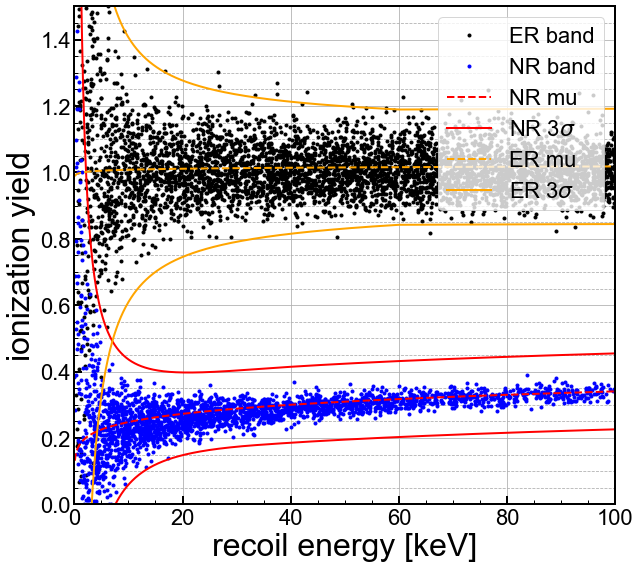

In [7]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


X = np.arange(0.1,100,0.1)
ax1.plot(Erer,Yer,'o',color='k', label='ER band',linewidth=2,markersize=3)
ax1.plot(Ernr,Ynr,'o',color='b', label='NR band',linewidth=2,markersize=3)

ax1.plot(X,ynr_muv(X),'r--',label='NR mu')
ax1.plot(X,ynr_muv(X)+3*ynr_sigv(X),'r-',label='NR 3$\sigma$')
ax1.plot(X,ynr_muv(X)-3*ynr_sigv(X),'r-',label=None)

ax1.plot(X,yer_muv(X),color='orange',linestyle='--',label='ER mu')
ax1.plot(X,yer_muv(X)+3*yer_sigv(X),color='orange',linestyle='-',label='ER 3$\sigma$')
ax1.plot(X,yer_muv(X)-3*yer_sigv(X),color='orange',linestyle='-',label=None)



#ax1.axvline(t(t_test[idx]), color='k', linestyle='-', lw=2, alpha=0.8,label=None)


ymin = 0
ymax = 1.5



ax1.set_yscale('linear')
#ax1.set_yscale('linear')
ax1.set_xlim(0, 100) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/yield_sim_F-ER.png')
plt.show()

In [8]:
#let's add some more uncertainty
Fnr = 60 #nuclear recoil fano factor
Nnr = (ylindv(Enr*1000.0)*Enr)/(eps/1000)
delNnr = np.random.normal(0.0,np.sqrt(Fnr*Nnr))
#print(Nnr[0:1000])
#print(delNnr[0:100])
#print(delNnr[0:100]*(eps/1000.0))
#print(delNnr[0:100]*(V/1000.0))

Qnr = Qnr + delNnr*(eps/1000.0)
Ptnr = Ptnr + delNnr*(V/1000.0)

Ernr = Ptnr - (V/eps)*Qnr
Ynr = Qnr/Ernr

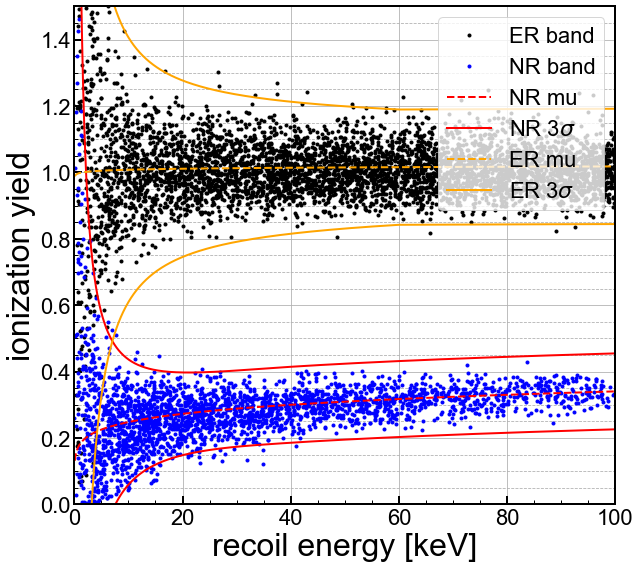

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


X = np.arange(0.1,100,0.1)
ax1.plot(Erer,Yer,'o',color='k', label='ER band',linewidth=2,markersize=3)
ax1.plot(Ernr,Ynr,'o',color='b', label='NR band',linewidth=2,markersize=3)

ax1.plot(X,ynr_muv(X),'r--',label='NR mu')
ax1.plot(X,ynr_muv(X)+3*ynr_sigv(X),'r-',label='NR 3$\sigma$')
ax1.plot(X,ynr_muv(X)-3*ynr_sigv(X),'r-',label=None)

ax1.plot(X,yer_muv(X),color='orange',linestyle='--',label='ER mu')
ax1.plot(X,yer_muv(X)+3*yer_sigv(X),color='orange',linestyle='-',label='ER 3$\sigma$')
ax1.plot(X,yer_muv(X)-3*yer_sigv(X),color='orange',linestyle='-',label=None)



#ax1.axvline(t(t_test[idx]), color='k', linestyle='-', lw=2, alpha=0.8,label=None)


ymin = 0
ymax = 1.5



ax1.set_yscale('linear')
#ax1.set_yscale('linear')
ax1.set_xlim(0, 100) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/yield_sim_F-60.png')
plt.show()